In [1]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import sklearn.preprocessing as sp
import seaborn as sns
%matplotlib inline

mp.rcParams['font.family'] = ['sans-serif']
mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['axes.unicode_minus']=False

# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname='C:\Windows\Fonts\安托粗黑.ttf', size=20)

bank = pd.read_csv('bank-additional-full.csv',sep=';',header='infer')
df_bank = pd.DataFrame(bank)
df_bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df_bank = df_bank[df_bank['duration']!=0]

In [5]:
bank_person = df_bank.iloc[:,0:7]
bank_person.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [6]:
print('bank:',bank_person['job'].unique())
print('marital:',bank_person['marital'].unique())
print('education:',bank_person['education'].unique())
print('default:',bank_person['default'].unique())
print('housing:',bank_person['housing'].unique())
print('loan:',bank_person['loan'].unique())

bank: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']


In [7]:
print('null - age:',bank_person['age'].isnull().any())
print('null - marital:',bank_person['marital'].isnull().any())
print('null - education:',bank_person['education'].isnull().any())
print('null - default:',bank_person['default'].isnull().any())
print('null - housing:',bank_person['housing'].isnull().any())
print('null - loan:',bank_person['loan'].isnull().any())

null - age: False
null - marital: False
null - education: False
null - default: False
null - housing: False
null - loan: False


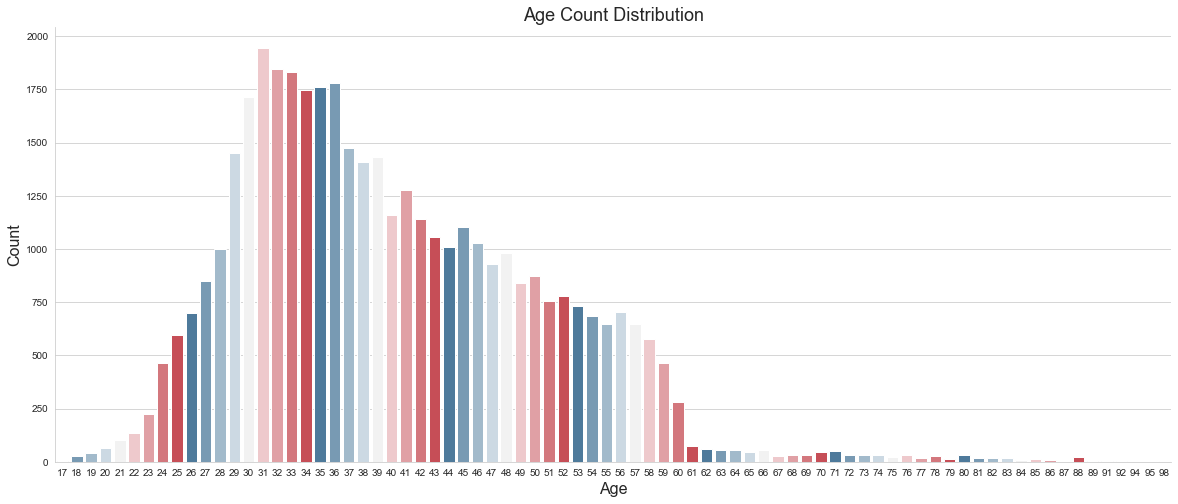

In [8]:
pl = sns.diverging_palette(240, 10, n=9)

sns.set_style('whitegrid')
fig,ax = mp.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='age',data=bank_person,palette=pl)
ax.set_xlabel('Age',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
ax.set_title('Age Count Distribution',fontsize=18)
sns.despine()

In [9]:
import sklearn.cluster as sc
def kmeans_labels(df,attribute):
    kmodel = sc.KMeans(n_clusters=4,n_jobs=4)
    bp_copy = df[attribute]
    kmodel.fit(bp_copy.values.reshape(len(bp_copy),1))
    centers = pd.DataFrame(kmodel.cluster_centers_).sort_values(by=0)
    w = centers.rolling(2).mean().iloc[1:]
    w = [0]+list(w[0])+[bp_copy.max()]
    df[attribute] = pd.cut(bp_copy,w,labels=range(4))

kmeans_labels(bank_person,'age')
print(bank_person.shape)
bank_person.head()

(41184, 7)


,age,job,marital,education,default,housing,loan
0,3,housemaid,married,basic.4y,no,no,no
1,3,services,married,high.school,unknown,no,no
2,1,services,married,high.school,no,yes,no
3,1,admin.,married,basic.6y,no,no,no
4,3,services,married,high.school,no,no,yes


In [10]:
lbe = sp.LabelEncoder()
bank_person['job'] = lbe.fit_transform(bank_person['job'])
bank_person['marital'] = lbe.fit_transform(bank_person['marital'])
bank_person['education'] = lbe.fit_transform(bank_person['education'])
bank_person['default'] = lbe.fit_transform(bank_person['default'])
bank_person['housing'] = lbe.fit_transform(bank_person['housing'])
bank_person['loan'] = lbe.fit_transform(bank_person['loan'])
bank_person

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,1,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,3,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


In [11]:
bank_related = df_bank.iloc[:,7:11]
bank_related

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442


In [12]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [13]:
bank_related['contact'] = lbe.fit_transform(bank_related['contact'])
bank_related['month'] = lbe.fit_transform(bank_related['month'])
bank_related['day_of_week'] = lbe.fit_transform(bank_related['day_of_week'])
kmeans_labels(bank_related,'duration')
bank_related

,contact,month,day_of_week,duration
0,1,6,1,1
1,1,6,1,0
2,1,6,1,0
3,1,6,1,0
4,1,6,1,1
...,...,...,...,...
41183,0,7,0,1
41184,0,7,0,1
41185,0,7,0,0
41186,0,7,0,1


In [14]:
bank_o = df_bank.iloc[:,11:15]
bank_o

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


In [15]:
bank_o['poutcome'] = lbe.fit_transform(bank_o['poutcome'])
kmeans_labels(bank_o,'campaign')
kmeans_labels(bank_o,'pdays')
bank_o.head()

,campaign,pdays,previous,poutcome
0,0,3,0,1
1,0,3,0,1
2,0,3,0,1
3,0,3,0,1
4,0,3,0,1


In [16]:
bank_o.tail()

,campaign,pdays,previous,poutcome
41183,0,3,0,1
41184,0,3,0,1
41185,0,3,0,1
41186,0,3,0,1
41187,1,3,1,0


In [17]:
bank_se = df_bank.iloc[:,15:-1]
bank_se

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


In [18]:
y = pd.get_dummies(df_bank['y'], drop_first = True)
print(y.shape)
type(y)

(41184, 1)


pandas.core.frame.DataFrame

In [19]:
bank_all = pd.concat([bank_person,bank_related,bank_o,bank_se,y],axis=1)
print(bank_all.shape)
bank_all.head()

(41184, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes
0,3,3,1,0,0,0,0,1,6,1,...,0,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,0,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,0,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,0,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,0,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
check_list = list(bank_all.columns)
for item in check_list:
    print(item,':',bank_all[item].isnull().any())

age : False
job : False
marital : False
education : False
default : False
housing : False
loan : False
contact : False
month : False
day_of_week : False
duration : False
campaign : False
pdays : True
previous : False
poutcome : False
emp.var.rate : False
cons.price.idx : False
cons.conf.idx : False
euribor3m : False
nr.employed : False
yes : False


In [21]:
bank_all[bank_all['pdays'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes
25497,0,10,2,5,0,2,0,0,7,4,...,0,NaN,1,2,-0.1,93.200,-42.0,4.120,5195.8,0
25996,1,4,1,6,0,2,2,1,7,4,...,1,NaN,2,2,-0.1,93.200,-42.0,4.120,5195.8,0
30238,2,9,1,5,0,2,0,0,0,2,...,0,NaN,1,2,-1.8,93.075,-47.1,1.365,5099.1,1
30314,1,0,1,6,0,2,0,0,0,2,...,0,NaN,1,2,-1.8,93.075,-47.1,1.365,5099.1,1
30417,0,0,2,6,0,2,0,0,0,2,...,0,NaN,1,2,-1.8,93.075,-47.1,1.365,5099.1,1
30688,1,1,1,1,1,2,0,0,6,3,...,0,NaN,1,2,-1.8,92.893,-46.2,1.344,5099.1,0
40360,2,0,1,6,0,2,2,0,1,4,...,0,NaN,3,2,-1.7,94.027,-38.3,0.900,4991.6,1
40364,0,8,2,6,0,2,0,0,1,4,...,0,NaN,3,2,-1.7,94.027,-38.3,0.900,4991.6,1
40365,0,8,2,2,0,2,0,0,1,4,...,0,NaN,1,2,-1.7,94.027,-38.3,0.900,4991.6,1
40376,0,8,2,6,0,2,0,1,1,4,...,0,NaN,5,2,-1.7,94.027,-38.3,0.900,4991.6,0


In [22]:
bank_all.dropna(inplace=True)
bank_all[bank_all['pdays'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,yes


In [23]:
import sklearn.model_selection as ms
y = bank_all['yes']
del(bank_all['yes'])
train_x,test_x,train_y,test_y = ms.train_test_split(bank_all,y,test_size=0.25,random_state=7)

In [24]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(30876, 20)
(30876,)
(10293, 20)
(10293,)


In [25]:
import sklearn.linear_model as lm
logi_reg_model = lm.LogisticRegression(solver='liblinear',C=5)
logi_reg_model.fit(train_x,train_y)
result = logi_reg_model.predict(test_x)

In [26]:
print(result.size)
print(test_y.size)
test_y = test_y.values
print((result==test_y).sum()/result.size)

10293
10293
0.9061498105508599


In [27]:
import sklearn.metrics as sm
lg_cr = sm.classification_report(test_y,result)
print('classification_report:\n',lg_cr)
lg_cm = sm.confusion_matrix(test_y,result)
print('confusion_matrix:\n',lg_cm)
lg_exam = ms.cross_val_score(logi_reg_model,train_x,train_y,cv=5,scoring='accuracy')
print('cross_val_score:\n',lg_exam)

classification_report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9109
           1       0.67      0.37      0.47      1184

    accuracy                           0.91     10293
   macro avg       0.79      0.67      0.71     10293
weighted avg       0.89      0.91      0.89     10293

confusion_matrix:
 [[8891  218]
 [ 748  436]]
cross_val_score:
 [0.90738342 0.9042915  0.90963563 0.90574899 0.9042915 ]


In [28]:
import sklearn.naive_bayes as nb
gb_model = nb.GaussianNB()
gb_model.fit(train_x,train_y)
gb_result = gb_model.predict(test_x)
gb_cr = sm.classification_report(test_y,gb_result)
print('classification_report:\n',gb_cr)
gb_cm = sm.confusion_matrix(test_y,gb_result)
print('confusion_matrix:\n',gb_cm)
gb_exam = ms.cross_val_score(gb_model,train_x,train_y,cv=5,scoring='accuracy')
print('cross_val_score:\n',gb_exam)

classification_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      9109
           1       0.38      0.55      0.45      1184

    accuracy                           0.84     10293
   macro avg       0.66      0.72      0.68     10293
weighted avg       0.87      0.84      0.86     10293

confusion_matrix:
 [[8032 1077]
 [ 527  657]]
cross_val_score:
 [0.84051166 0.84631579 0.84388664 0.85004049 0.84550607]


In [29]:
import sklearn.ensemble as se
se_model= se.RandomForestClassifier(max_depth=6,n_estimators=200,random_state=7)

In [30]:
train_scores,test_scores = ms.validation_curve(se_model,train_x,train_y,'n_estimators',np.arange(120,240,20),cv=5)
print(train_scores)

KeyboardInterrupt: 

In [ ]:
_,train_scores,test_scores = ms.learning_curve(se_model,train_x,train_y,[0.7,0.8,0.9],cv=5)
print(train_score)
print(test_score)

In [ ]:
se_model.fit(train_x,train_y)
se_result = se_model.predict(test_x)
se_cr = sm.classification_report(test_y,se_result)
print('classification_report:\n',se_cr)
se_cm = sm.confusion_matrix(test_y,se_result)
print('confusion_matrix:\n',se_cm)
se_exam = ms.cross_val_score(se_model,train_x,train_y,cv=5,scoring='accuracy')
print('cross_val_score:\n',se_exam)

In [ ]:
import sklearn.svm as svm
svm_model = svm.SVC(kernel='linear',class_weight='balanced', probability=True)
svm_model.fit(train_x,train_y)
svm_result = svm_model.predict(test_x)
svm_cr = sm.classification_report(test_y,svm_result)
print('classification_report:\n',svm_cr)
svm_cm = sm.confusion_matrix(test_y,svm_result)
print('confusion_matrix:\n',svm_cm)
svm_exam = ms.cross_val_score(svm_model,train_x,train_y,cv=5,scoring='accuracy')
print('cross_val_score:\n',svm_exam)

In [ ]:
params = [{'kernel':['linear'],'C':[1,5,10]},{'kernel':['poly'],'degree':[2,3]},{'kernel':'rbf','C':[1,5,10],'gamma':[1,0.1]}]
grid_model = ms.GridSearchCV(svm.SVC(probability=True),params,cv=5)
grid_model.fit(train_x,train_y)
print('param:\n',model.cv_result_['param'])
print('mean_test_score:\n',model.cv_result_['mean_test_score'])
print('best_params:\n',model.best_params_)
print('best_score:\n',model.best_score_)
print('best_estimator:\n',model.best_estimator_)

In [ ]:
# import sklearn.svm as svm
# svm_model = svm.SVC(kernel='poly',degree=3, probability=True)
# svm_model.fit(train_x,train_y)
# svm_result = svm_model.predict(test_x)
# svm_cr = sm.classification_report(test_y,svm_result)
# print('classification_report:\n',svm_cr)
# svm_cm = sm.confusion_matrix(test_y,svm_result)
# print('confusion_matrix:\n',svm_cm)
# svm_exam = ms.cross_val_score(svm_model,train_x,train_y,cv=5,scoring='accuracy')
# print('cross_val_score:\n',svm_exam)
# prob = svm_model.predict_proba(test_x)

In [ ]:
# import sklearn.svm as svm
# svm_model = svm.SVC(kernel='rbf',C=600, gamma=0.01,probability=True)
# svm_model.fit(train_x,train_y)
# svm_result = svm_model.predict(test_x)
# svm_cr = sm.classification_report(test_y,svm_result)
# print('classification_report:\n',svm_cr)
# svm_cm = sm.confusion_matrix(test_y,svm_result)
# print('confusion_matrix:\n',svm_cm)
# svm_exam = ms.cross_val_score(svm_model,train_x,train_y,cv=5,scoring='accuracy')
# print('cross_val_score:\n',svm_exam)
# prob = svm_model.predict_proba(test_x)